###  Credit card fraud detection is crucial in protecting consumers and financial institutions from significant financial losses and security breaches. As online transactions increase, fraudsters continuously evolve their tactics, making traditional methods insufficient. Machine learning models provide an advanced solution by detecting patterns and anomalies in transaction data, enabling real-time identification of fraud. This helps maintain trust, minimize losses, and enhance the security of payment systems.

# Description of dataset

1. **Time**: The time (in seconds) since the first transaction.
2. **V1 to V28**: Principal component analysis (PCA)-transformed features to anonymize the data, containing compressed information about the original features.
3. **Amount**: The transaction amount in dollars.
4. **Class**: The target variable, where **0** indicates a non-fraudulent transaction and **1** indicates a fraudulent transaction.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
df=pd.read_csv("CreditFraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Checking for missing values in the entire dataframe
missing_values = df.isnull().sum()

# To check if any column has missing values
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Overview of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA:

C:\Users\satya\AppData\Local\Temp\ipykernel_21540\3476601911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


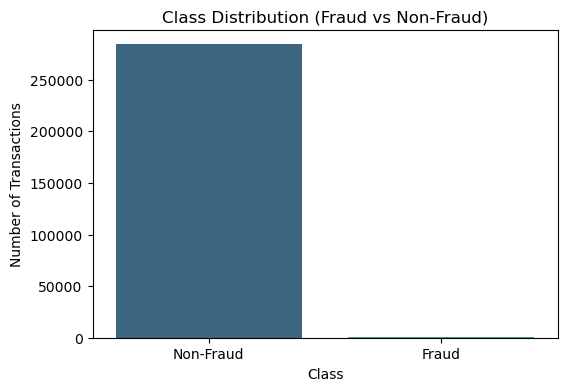

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Class' column
class_distribution = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.show()

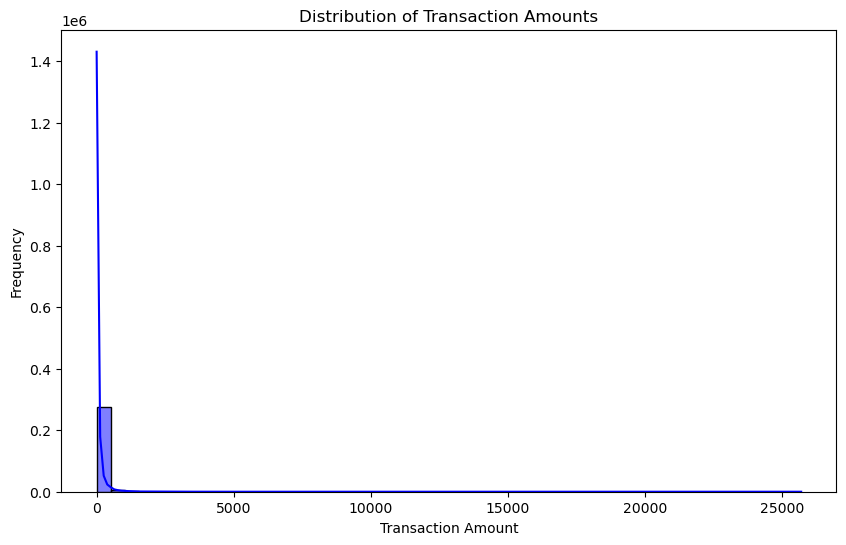

In [11]:
# Distribution of the transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


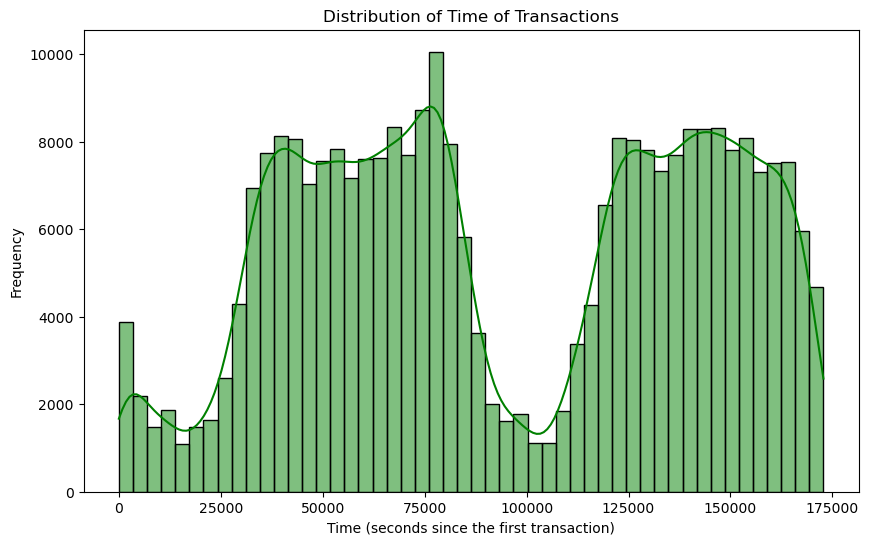

In [13]:
# Distribution of time
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Time of Transactions')
plt.xlabel('Time (seconds since the first transaction)')
plt.ylabel('Frequency')
plt.show()


# Model training 

In [25]:
# Features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (except 'Class' and 'Amount')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [29]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled dataset
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [31]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:,1])
print(f'ROC-AUC Score: {roc_auc:.2f}')


Accuracy: 99.95%
Confusion Matrix:
[[56852    12]
 [   17    81]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.97


In [35]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities for the positive class (fraud)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR (False Positive Rate), TPR (True Positive Rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


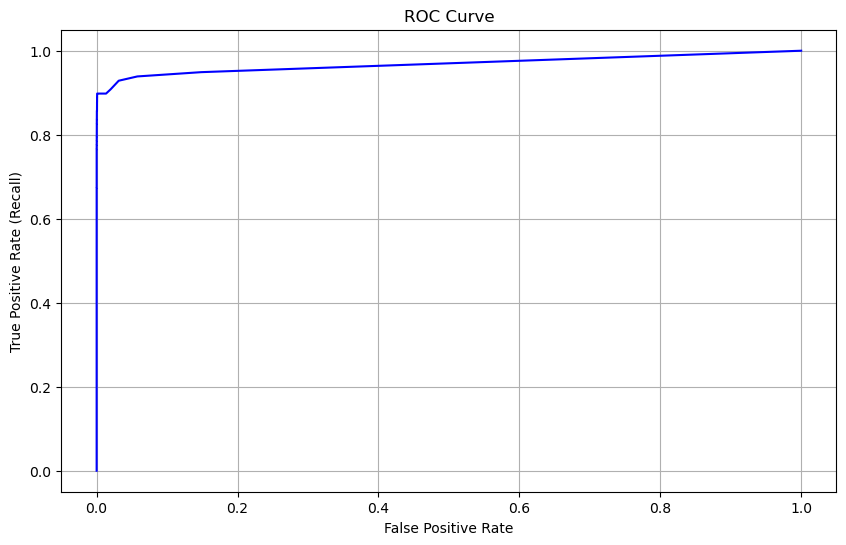

In [37]:
import matplotlib.pyplot as plt

# Plotting ROC curve to find the best threshold
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()



The model for credit card fraud detection achieved an initial accuracy of 99.95%, with a recall of 83% for detecting fraudulent transactions. After applying an optimized threshold of 0.28, the recall improved to 89%, indicating better fraud detection, though precision dropped to 70%, leading to more false positives. Despite this trade-off, the model maintained high accuracy due to the large number of non-fraudulent transactions. The increase in recall demonstrates the model's improved sensitivity in identifying fraud, which is crucial in real-world applications where missing fraud can be more costly than dealing with false alarms.

In [39]:
# Find the optimal threshold (where TPR is maximized, and FPR is minimized)
optimal_idx = np.argmax(tpr - fpr)  # Maximizing TPR while minimizing FPR
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

# Apply the optimal threshold
y_pred_optimal = np.where(y_pred_proba > optimal_threshold, 1, 0)

# Confusion matrix with the optimal threshold
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print('Confusion Matrix with optimal threshold:')
print(conf_matrix_optimal)

# Classification report with the optimal threshold
class_report_optimal = classification_report(y_test, y_pred_optimal)
print('Classification Report with optimal threshold:')
print(class_report_optimal)


Optimal Threshold: 0.28
Confusion Matrix with optimal threshold:
[[56827    37]
 [   11    87]]
Classification Report with optimal threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.89      0.78        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

